# Importación de las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from plots_ import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report, mean_squared_error, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Etapas 1 y 2: Análisis exploratorio de datos y preparación de datos
Estas etapas ayudan a entender la distribución de variables, visualizar los datos, encontrar correlaciones entre variables, identificar y corregir valores faltantes o atípicos, transformar variables, seleccionar las características y realizar la partición de datos, todo esto se realiza para detectar patrones, anomalías y relaciones entre variables garantizando que los datos sean limpios, coherentes y listos para formular hipótesis y ser utilizados por los modelos.

Lectura y visualización del DataFrame a fin de conocer las dimensiones del conjunto de datos y los tipos de datos

In [2]:
df_cars = pd.read_csv('ML_car.csv')
print(df_cars.dtypes)
df_cars

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Verificar si existen valores faltantes o nulos en el DF

In [3]:
df_columns = df_cars.columns.tolist()

# Contar los valores nulos en cada columna

nulls = {col: df_cars[col].isnull().sum() for col in df_columns}

# Crear un DataFrame a partir del diccionario

nulls_in_df = pd.DataFrame(nulls.items(), columns=['Columna', 'Total Nulos'])
nulls_in_df

,Columna,Total Nulos
0,car_ID,0
1,symboling,0
2,CarName,0
3,fueltype,0
4,aspiration,0
5,doornumber,0
6,carbody,0
7,drivewheel,0
8,enginelocation,0
9,wheelbase,0


Generar un Boxplot a fin de conocer si existen valores atípicos que puedan afectar a futuro el modelo

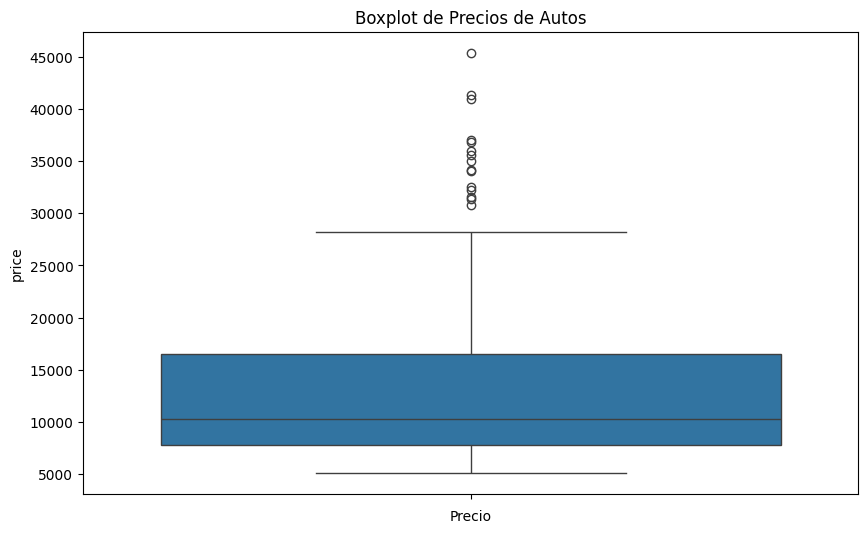

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cars['price'])
plt.title('Boxplot de Precios de Autos')
plt.xlabel('Precio')
plt.show()

Análisis de distribución de la variable precio

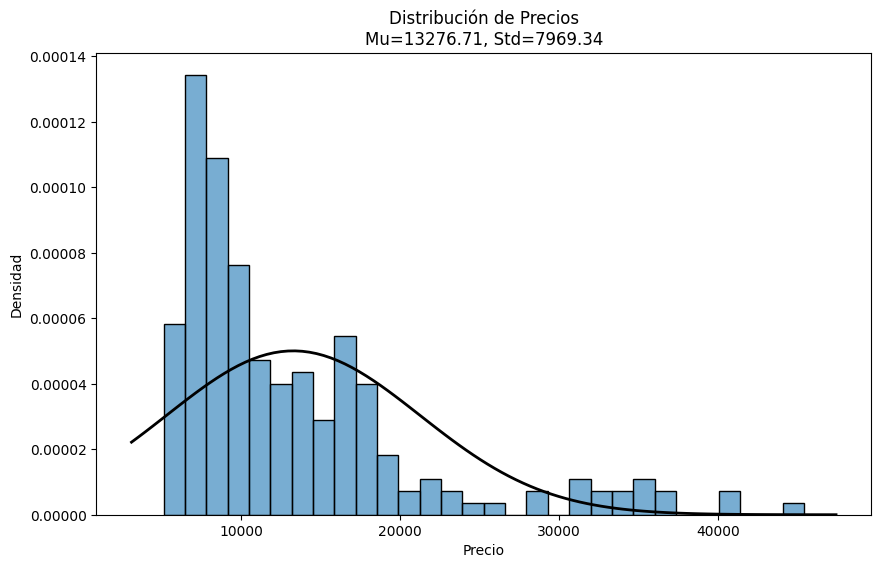

In [5]:
# Obtener los precios

precios = df_cars['price']

# Calcular parámetros de la distribución normal

mu, std = norm.fit(precios)

# Crear un histograma de los precios

plt.figure(figsize=(10, 6))
sns.histplot(precios, bins=30, kde=False, stat='density', alpha=0.6)

# Crear la curva de la distribución normal

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Densidad de probabilidad

# Graficar la curva de la distribución normal

plt.plot(x, p, 'k', linewidth=2)
title = f'Distribución de Precios\nMu={mu:.2f}, Std={std:.2f}'
plt.title(title)
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()

Análisis de correlaciones entre variables numéricas utilizando matriz de correlación, para ello se codifican las variables categóricas y se obtienen variables dummies utilizando pandas para lograrlo. Obtenemos una lista de las variables que se correlacionan con el precio

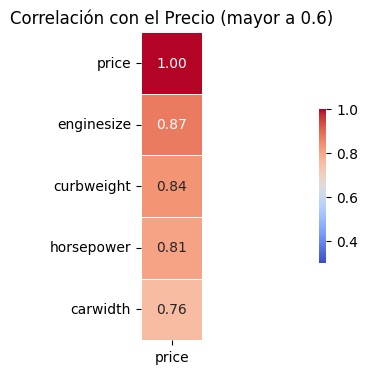

In [6]:
# Generar el df con las variables dummies

df_dummies = pd.get_dummies(df_cars, drop_first=True, dtype=float)

# Generar la matriz de correlación y ordenarla de manera descendente 
# filtrar por variables que tengan correlación con el precio y sea mayor al 70%

correlation_matrix = df_dummies.corr()
correlation_with_price = correlation_matrix[['price']].sort_values(by='price', ascending=False)
filtered_correlation = correlation_with_price[correlation_with_price['price'].abs() > 0.7]
variable_above_70 = filtered_correlation[1:].index.tolist()

# Crear un mapa de calor para la correlación con 'price' y ajustar el grosor de la barra de color

plt.figure(figsize=(30, 4))
sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, vmin=0.3, vmax=1)  # Ajustar el tamaño de la barra de color
plt.title('Correlación con el Precio (mayor a 0.6)')
plt.show()

Resumir los precios calculando las estadísticas descriptivas (media, mediana, desviación estándar, cuartiles) y crear una tabla de resumen

In [7]:
# Calcular estadísticas descriptivas para la columna 'price'

price_stats = {'Media': df_cars['price'].mean(),'Mediana': df_cars['price'].median(),'Desviación Estándar': df_cars['price'].std(),'Cuartil 1': df_cars['price'].quantile(0.25),'Cuartil 2': df_cars['price'].quantile(0.50),'Cuartil 3': df_cars['price'].quantile(0.75),}

# Crear un DataFrame para el resumen

median_price = df_cars['price'].median()
summary_df = pd.DataFrame(price_stats, index=[0])
summary_df

,Media,Mediana,Desviación Estándar,Cuartil 1,Cuartil 2,Cuartil 3
0,13276.710571,10295.0,7988.852332,7788.0,10295.0,16503.0


División de datos en conjuntos de entrenamiento, validación y prueba para evaluar el rendimiento de los modelos

In [11]:
# Para los modelos en general
X = df_dummies[variable_above_70]

In [12]:
# Para el modelo de clasificación

df_dummies['price_category'] = (df_dummies["price"] > median_price).astype(int)
y_c = df_dummies["price_category"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size=0.2, random_state=42)

In [13]:
# Para el modelo de regresión

y_r = df_dummies["price"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_r, test_size=0.2, random_state=42)

# Etapa 3: Modelamiento y evaluación de los modelos
* En la fase de modelamiento, se construyen los modelos predictivos basados en los datos procesados, usando algoritmos específicos para cada tipo de problema, ya sea de clasificación o regresión.
* En la fase de evaluación, se mide el rendimiento del modelo con datos de testeo (X_test) para evaluar qué tan bien generaliza el modelo, es decir, su capacidad para hacer predicciones precisas en nuevos datos.

# Modelo 1: Random Forest Classifier utilizando hiperparametros
Entrenamiento y evaluación del modelo teniendo en cuenta los siguientes hiperparámetros:
* n_estimators=200
* max_depth= 10
* min_samples_split=5
* min_samples_leaf=4
* max_features='sqrt'
* bootstrap=True
* random_state=42

Matriz de confusión modelo Random Forest Classifier:
 [[20  3]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.86      1.00      0.92        18

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.94      0.93      0.93        41

ROC-AUC:  0.9975845410628019


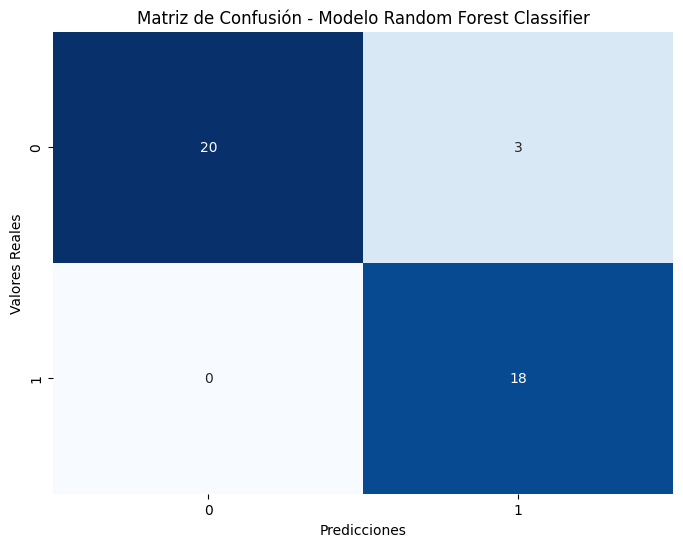

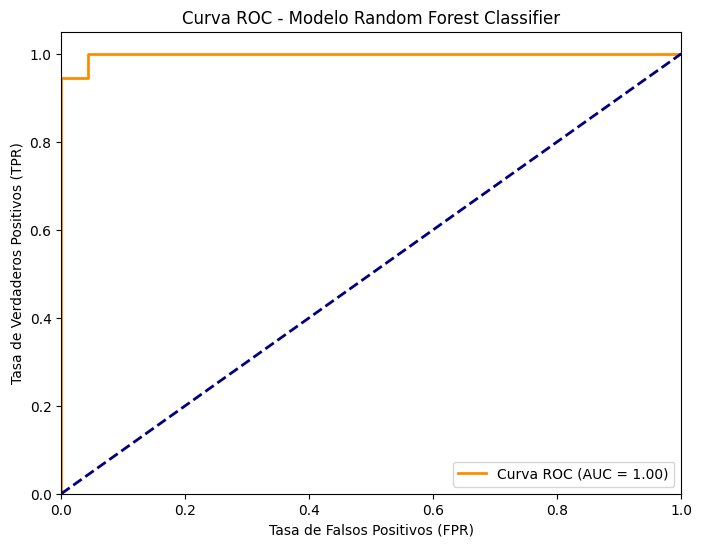

In [14]:
# Instanciar el modelo y lo entrenarlo con las variables seleccionadas en la matriz de correlación

modelo = RandomForestClassifier(n_estimators=200, max_depth= 10, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', bootstrap=True, random_state=42)
modelo.fit(X_train_c, y_train_c)

# Evaluamos el modelo antes de filtrar

y_pred_RFC = modelo.predict(X_test_c)

# Matriz de confusión y reporte de clasificación

conf_matrix = confusion_matrix(y_test_c, y_pred_RFC)
print("Matriz de confusión modelo Random Forest Classifier:\n", conf_matrix)
print(classification_report(y_test_c, y_pred_RFC))

# Evaluar usando ROC-AUC (para clasificación binaria)

if len(set(y_test_c)) == 2:  # Solo se usa para problemas binarios
    roc_auc = roc_auc_score(y_test_c, modelo.predict_proba(X_test_c)[:, 1])
    print("ROC-AUC: ", roc_auc)
    
# Matriz de confusión para el modelo Random Forest Classifier

plot_confusion_matrix(conf_matrix, 'Modelo Random Forest Classifier')

# Curva ROC para el modelo Random Forest Classifier

plot_roc_curve(y_test_c, modelo, X_test_c, 'Modelo Random Forest Classifier')

f1_RFC = f1_score(y_test_c, y_pred_RFC, average='weighted')

# Mostrar gráfico

plt.show()

Generación del DataFrame con los resultados de las predicciones

In [15]:
df_predictions_RFC = pd.DataFrame({'category': y_test_c, 'category_predicted': y_pred_RFC})
df_predictions_RFC['category'] = df_predictions_RFC['category'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
df_predictions_RFC['category_predicted'] = df_predictions_RFC['category_predicted'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_RFC[columns_to_add] = df_cars.loc[y_test_c.index, columns_to_add].values
df_predictions_RFC

,category,category_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,Gama Alta,Gama Alta,bmw x4,182,209,3230,66.9
9,Gama Alta,Gama Alta,audi 5000s (diesel),160,131,3053,67.9
100,Gama Baja,Gama Baja,nissan nv200,97,120,2302,65.2
132,Gama Alta,Gama Alta,saab 99e,110,121,2658,66.5
68,Gama Alta,Gama Alta,buick century luxus (sw),123,183,3750,70.3
95,Gama Baja,Gama Baja,nissan juke,69,97,2028,63.8
159,Gama Baja,Gama Baja,toyota corolla,56,110,2275,64.4
162,Gama Baja,Gama Baja,toyota mark ii,70,98,2140,64.4
147,Gama Baja,Gama Alta,subaru tribeca,94,108,2455,65.4
182,Gama Baja,Gama Baja,vokswagen rabbit,52,97,2261,65.5


# Modelo 1: Decision Tree Classifier 1
Entrenamiento y evaluación del modelo teniendo en cuenta los siguientes hiperparámetros:
* max_depth= 8
* min_samples_split=5
* min_samples_leaf=6
* random_state=42

[[21  2]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.89      0.94      0.92        18

    accuracy                           0.93        41
   macro avg       0.92      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41

Accuracy:  0.926829268292683


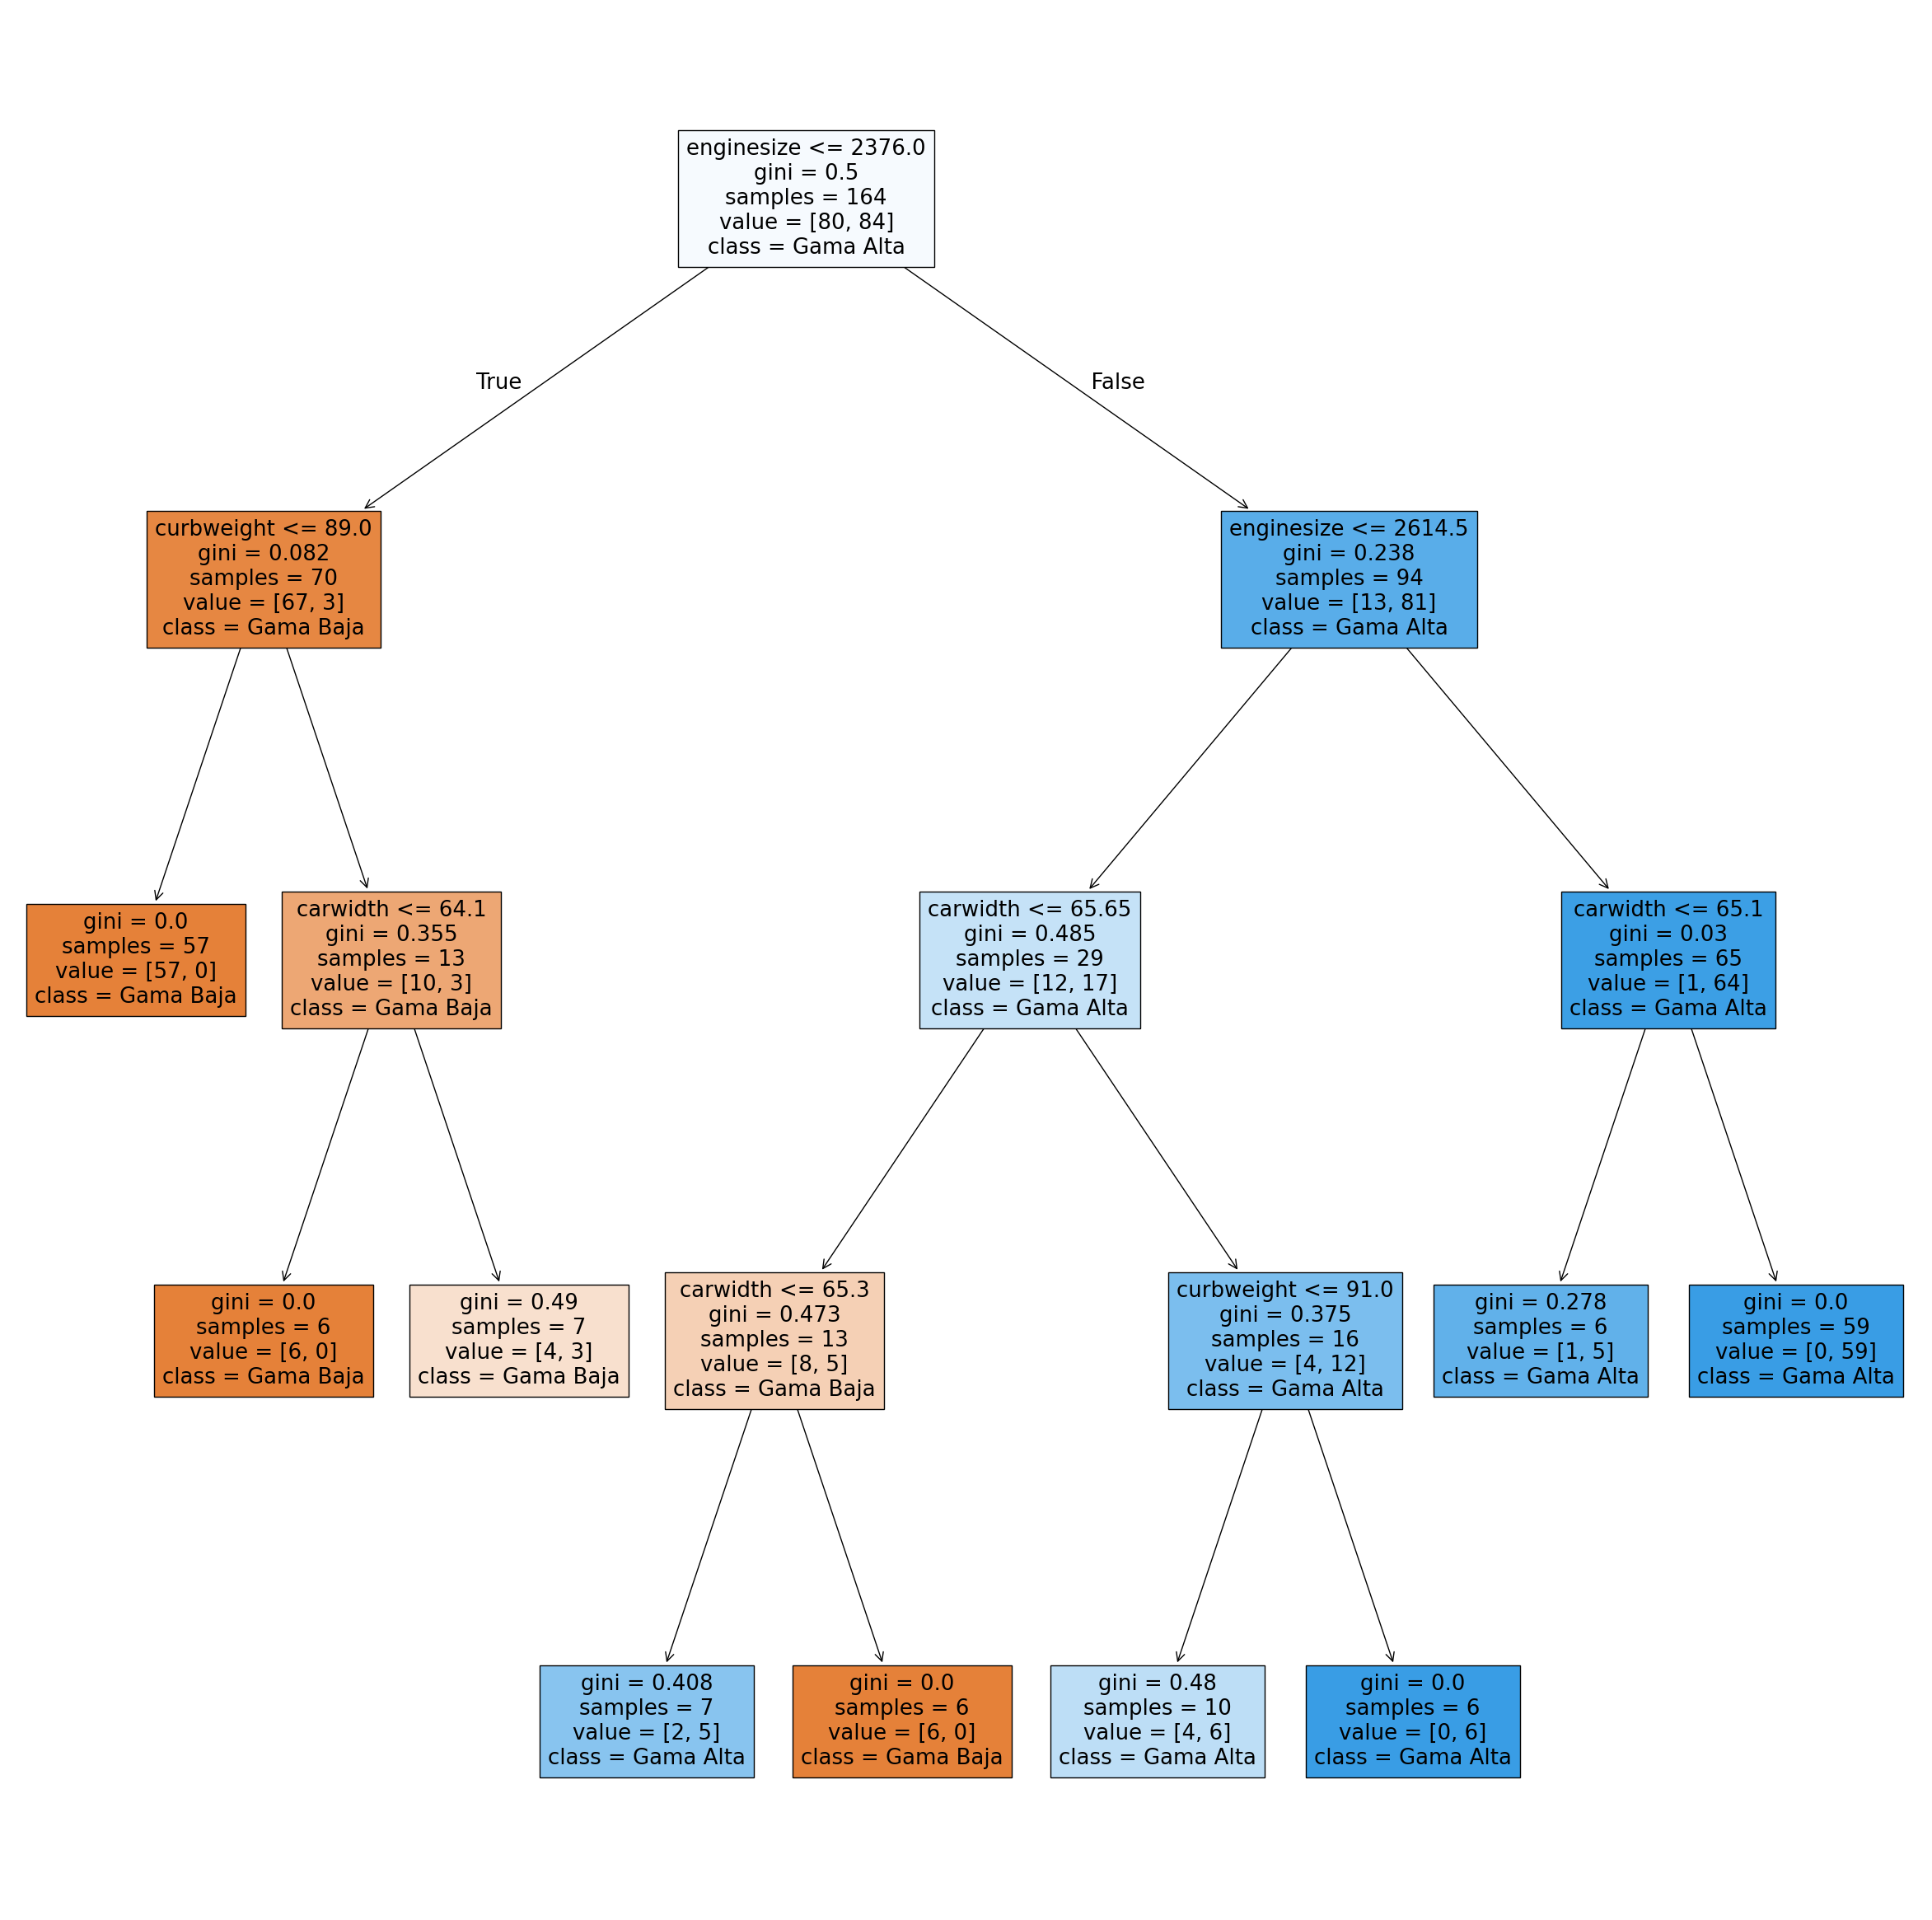

In [16]:
# Crear y entrenar el modelo de Árbol de Decisión

tree_model = DecisionTreeClassifier(max_depth= 8, min_samples_split=5, min_samples_leaf=6, random_state=42)
tree_model.fit(X_train_c, y_train_c)

# Hacer predicciones

y_pred_DTC1 = tree_model.predict(X_test_c)

# Evaluar el modelo

print(confusion_matrix(y_test_c, y_pred_DTC1))
print(classification_report(y_test_c, y_pred_DTC1))

# Evaluamos usando Accuracy

accuracy = accuracy_score(y_test_c, y_pred_DTC1)
print("Accuracy: ", accuracy)


# Visualizar el árbol de decisión

plt.figure(figsize=(30,30))
tree.plot_tree(tree_model, feature_names=["horsepower", "enginesize", "curbweight", "carwidth"], class_names=["Gama Baja", "Gama Alta"], filled=True)
plt.show()

Generación del Dataframe con las predicciones

In [17]:
df_predictions_DTC1 = pd.DataFrame({'category': y_test_c, 'category_predicted': y_pred_DTC1})
df_predictions_DTC1['category'] = df_predictions_DTC1['category'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
df_predictions_DTC1['category_predicted'] = df_predictions_DTC1['category_predicted'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_DTC1[columns_to_add] = df_cars.loc[y_test_c.index, columns_to_add].values
df_predictions_DTC1

,category,category_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,Gama Alta,Gama Alta,bmw x4,182,209,3230,66.9
9,Gama Alta,Gama Alta,audi 5000s (diesel),160,131,3053,67.9
100,Gama Baja,Gama Baja,nissan nv200,97,120,2302,65.2
132,Gama Alta,Gama Alta,saab 99e,110,121,2658,66.5
68,Gama Alta,Gama Alta,buick century luxus (sw),123,183,3750,70.3
95,Gama Baja,Gama Baja,nissan juke,69,97,2028,63.8
159,Gama Baja,Gama Baja,toyota corolla,56,110,2275,64.4
162,Gama Baja,Gama Baja,toyota mark ii,70,98,2140,64.4
147,Gama Baja,Gama Baja,subaru tribeca,94,108,2455,65.4
182,Gama Baja,Gama Baja,vokswagen rabbit,52,97,2261,65.5


# Modelo 1: Decision Tree Classifier 2
Entrenamiento y evaluación del modelo teniendo en cuenta solo el hiperparámetro random_state = 42

[[22  1]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        18

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41

Accuracy:  0.9512195121951219


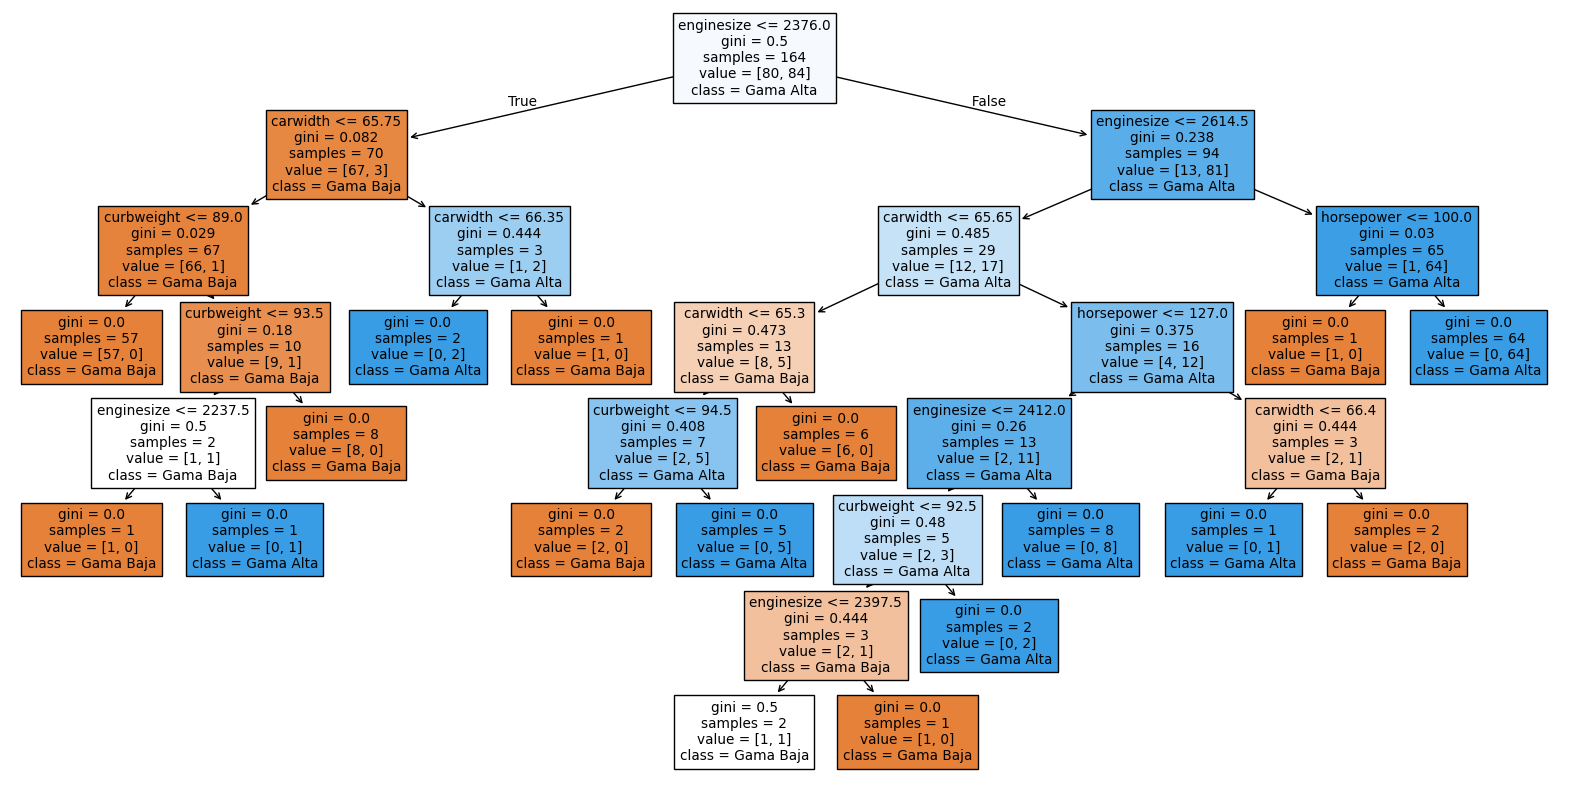

In [18]:
# Crear y entrenar el modelo de Árbol de Decisión

tree_model = DecisionTreeClassifier(random_state = 42)
tree_model.fit(X_train_c, y_train_c)

# Hacer predicciones

y_pred_DTC2 = tree_model.predict(X_test_c)

# Evaluar el modelo

print(confusion_matrix(y_test_c, y_pred_DTC2))
print(classification_report(y_test_c, y_pred_DTC2))

# Evaluamos usando Accuracy

accuracy = accuracy_score(y_test_c, y_pred_DTC2)
print("Accuracy: ", accuracy)

# Visualización del árbol de decisión

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=["horsepower", "enginesize", "curbweight", "carwidth"], class_names=["Gama Baja", "Gama Alta"], filled=True)
plt.show()

Generación del Dataframe con las predicciones

In [19]:
df_predictions_DTC2 = pd.DataFrame({'category': y_test_c, 'category_predicted': y_pred_DTC2})
df_predictions_DTC2['category'] = df_predictions_DTC2['category'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
df_predictions_DTC2['category_predicted'] = df_predictions_DTC2['category_predicted'].apply(lambda x: 'Gama Baja' if x == 0 else 'Gama Alta')
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_DTC2[columns_to_add] = df_cars.loc[y_test_c.index, columns_to_add].values
df_predictions_DTC2

,category,category_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,Gama Alta,Gama Alta,bmw x4,182,209,3230,66.9
9,Gama Alta,Gama Alta,audi 5000s (diesel),160,131,3053,67.9
100,Gama Baja,Gama Baja,nissan nv200,97,120,2302,65.2
132,Gama Alta,Gama Alta,saab 99e,110,121,2658,66.5
68,Gama Alta,Gama Alta,buick century luxus (sw),123,183,3750,70.3
95,Gama Baja,Gama Baja,nissan juke,69,97,2028,63.8
159,Gama Baja,Gama Baja,toyota corolla,56,110,2275,64.4
162,Gama Baja,Gama Baja,toyota mark ii,70,98,2140,64.4
147,Gama Baja,Gama Baja,subaru tribeca,94,108,2455,65.4
182,Gama Baja,Gama Baja,vokswagen rabbit,52,97,2261,65.5


# Modelo 2: Regresión Lineal Múltiple

Regresión Lineal - MSE: 14203295.00, R^2: 0.82


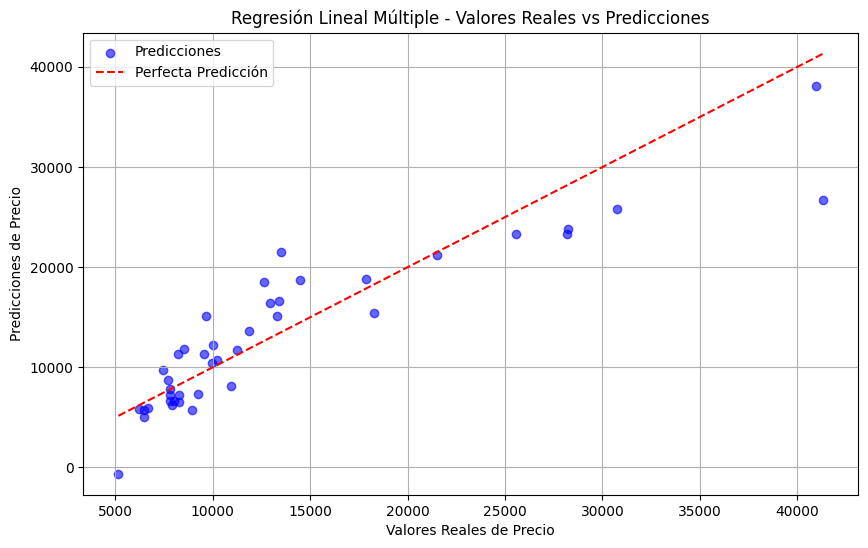

In [20]:
# Modelo de Regresión Lineal

linear_model = LinearRegression()
linear_model.fit(X_train_r, y_train_r)

# Predicciones

y_pred_linear = linear_model.predict(X_test_r)

# Evaluación

mse_linear = mean_squared_error(y_test_r, y_pred_linear)
r2_linear = r2_score(y_test_r, y_pred_linear)

print(f'Regresión Lineal - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}')
plt.figure(figsize=(10,6))
plt.scatter(y_test_r, y_pred_linear, color='blue', label='Predicciones', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], color='red', linestyle='--', label='Perfecta Predicción')

# Gráfico de dispersión

plt.xlabel('Valores Reales de Precio')
plt.ylabel('Predicciones de Precio')
plt.title('Regresión Lineal Múltiple - Valores Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()


Dataframe con las predicciones y los valores reales

In [21]:
df_predictions_LR = pd.DataFrame({'price': y_test_r, 'price_predicted': y_pred_linear})
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_LR[columns_to_add] = df_cars.loc[y_test_r.index, columns_to_add].values
df_predictions_LR

,price,price_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,30760.000,25823.023321,bmw x4,182,209,3230,66.9
9,17859.167,18798.776992,audi 5000s (diesel),160,131,3053,67.9
100,9549.000,11334.767427,nissan nv200,97,120,2302,65.2
132,11850.000,13652.308378,saab 99e,110,121,2658,66.5
68,28248.000,23815.779938,buick century luxus (sw),123,183,3750,70.3
95,7799.000,6599.120185,nissan juke,69,97,2028,63.8
159,7788.000,7802.464610,toyota corolla,56,110,2275,64.4
162,9258.000,7335.197077,toyota mark ii,70,98,2140,64.4
147,10198.000,10675.003439,subaru tribeca,94,108,2455,65.4
182,7775.000,7226.640607,vokswagen rabbit,52,97,2261,65.5


# Modelo 2: Random Forest Regressor
Entrenamiento y evaluación del modelo utilizando los hiperparámetros:
* n_estimators=100
* random_state=42

Random Forest - MSE: 3962403.74, R^2: 0.95


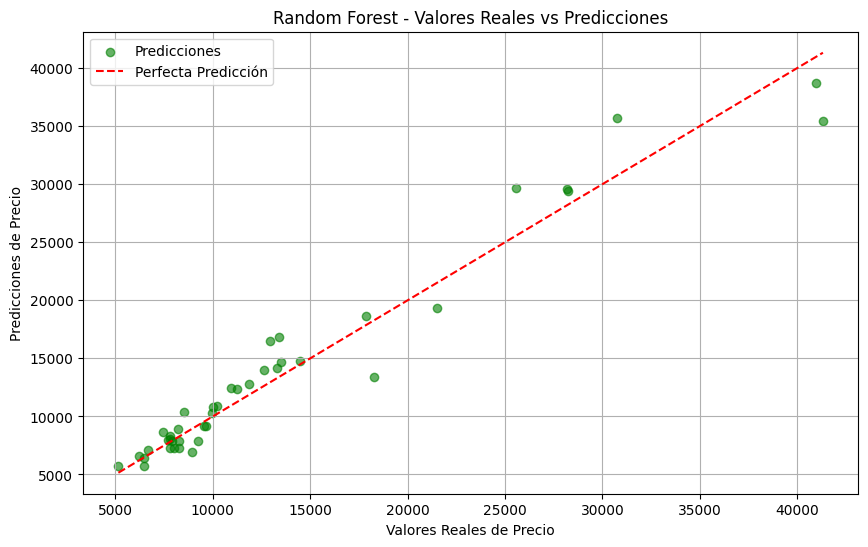

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_r, y_train_r)

# Predicciones

y_pred_rf = rf_model.predict(X_test_r)

# Evaluación

mse_rf = mean_squared_error(y_test_r, y_pred_rf)
r2_rf = r2_score(y_test_r, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}')

# Gráfico de dispersión 

plt.figure(figsize=(10,6))
plt.scatter(y_test_r, y_pred_rf, color='green', label='Predicciones', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], color='red', linestyle='--', label='Perfecta Predicción')

plt.xlabel('Valores Reales de Precio')
plt.ylabel('Predicciones de Precio')
plt.title('Random Forest - Valores Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()

Generación el DataFrame

In [23]:
df_predictions_RFR = pd.DataFrame({'price': y_test_r, 'price_predicted': y_pred_rf})
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_RFR[columns_to_add] = df_cars.loc[y_test_r.index, columns_to_add].values
df_predictions_RFR

,price,price_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,30760.000,35685.080000,bmw x4,182,209,3230,66.9
9,17859.167,18629.770000,audi 5000s (diesel),160,131,3053,67.9
100,9549.000,9179.650000,nissan nv200,97,120,2302,65.2
132,11850.000,12828.902500,saab 99e,110,121,2658,66.5
68,28248.000,29437.740000,buick century luxus (sw),123,183,3750,70.3
95,7799.000,7303.633333,nissan juke,69,97,2028,63.8
159,7788.000,8091.880000,toyota corolla,56,110,2275,64.4
162,9258.000,7841.880000,toyota mark ii,70,98,2140,64.4
147,10198.000,10917.770000,subaru tribeca,94,108,2455,65.4
182,7775.000,8269.970000,vokswagen rabbit,52,97,2261,65.5


# Modelo 3: XGBoost Regressor
Entrenamiento y evaluación del modelo utilizando los hiperparámetros:
* n_estimators=100
* learning_rate=0.2
* max_depth=6
* random_state=42

XGBoost - MSE: 5234883.64, R^2: 0.93


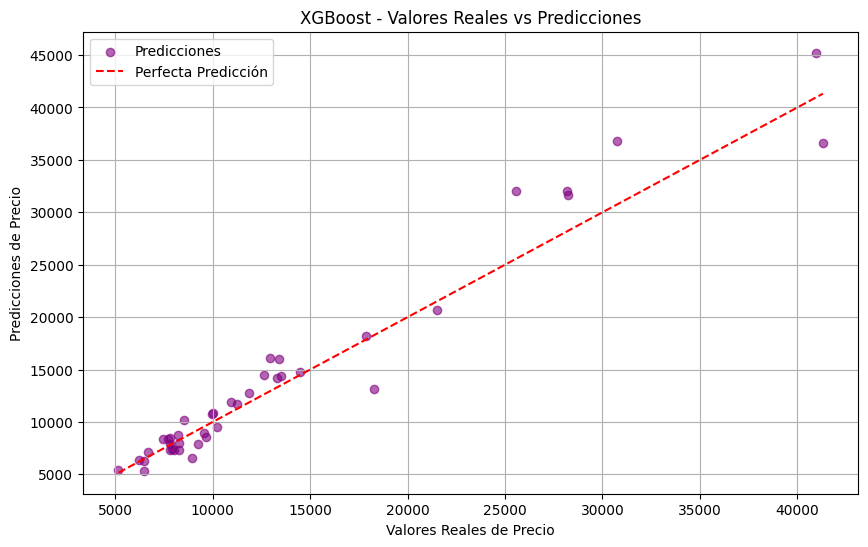

In [24]:
# Generar y entrenar el modelo

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=6, random_state = 42)
xgb_model.fit(X_train_r, y_train_r)

# Predicciones

y_pred_xgb = xgb_model.predict(X_test_r)

# Evaluación

mse_xgb = mean_squared_error(y_test_r, y_pred_xgb)
r2_xgb = r2_score(y_test_r, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb:.2f}, R^2: {r2_xgb:.2f}')

# Gráfico de dispersión

plt.figure(figsize=(10,6))
plt.scatter(y_test_r, y_pred_xgb, color='purple', label='Predicciones', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], color='red', linestyle='--', label='Perfecta Predicción')

plt.xlabel('Valores Reales de Precio')
plt.ylabel('Predicciones de Precio')
plt.title('XGBoost - Valores Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()


Generación el DataFrame

In [25]:
df_predictions_XGB = pd.DataFrame({'price': y_test_r, 'price_predicted': y_pred_xgb})
columns_to_add = ['CarName', 'horsepower', 'enginesize', 'curbweight', 'carwidth']
df_predictions_XGB[columns_to_add] = df_cars.loc[y_test_r.index, columns_to_add].values
df_predictions_XGB

,price,price_predicted,CarName,horsepower,enginesize,curbweight,carwidth
15,30760.000,36764.453125,bmw x4,182,209,3230,66.9
9,17859.167,18231.330078,audi 5000s (diesel),160,131,3053,67.9
100,9549.000,8941.306641,nissan nv200,97,120,2302,65.2
132,11850.000,12744.661133,saab 99e,110,121,2658,66.5
68,28248.000,31656.480469,buick century luxus (sw),123,183,3750,70.3
95,7799.000,7319.400391,nissan juke,69,97,2028,63.8
159,7788.000,7909.774414,toyota corolla,56,110,2275,64.4
162,9258.000,7913.917480,toyota mark ii,70,98,2140,64.4
147,10198.000,9519.957031,subaru tribeca,94,108,2455,65.4
182,7775.000,8505.848633,vokswagen rabbit,52,97,2261,65.5
